NATURE OF THE DATA
- Predictive task “Will a person buy the deposit?” --> supervised ML
1. Classification
2. Regression

In [40]:
import pandas as pd

bank_data_set = pd.read_csv('Data/bank-additional/bank-additional/bank-additional-full.csv', delimiter=";")
    # Was bedeutet delimiter?
print(bank_data_set.index)
bank_data_set.describe(include='all')

RangeIndex(start=0, stop=41188, step=1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


--> No missing values in dataset

In [41]:
bank_data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Distribution of class variables:
Look into the class distribution to see if it is a balanced data or not

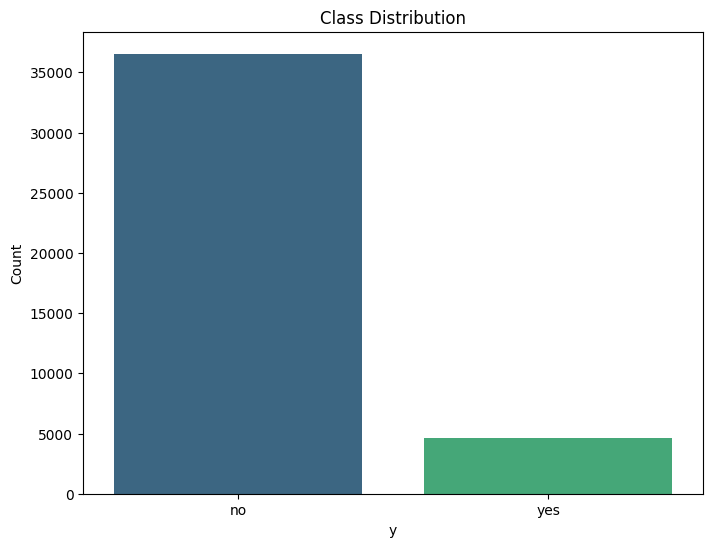

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(8, 6))

# Keine Ahnung was das eigentlich bedeutet:
sns.countplot(x='y', data=bank_data_set, hue='y', palette='viridis', legend=False)

plt.title('Class Distribution')
plt.xlabel('y')
plt.ylabel('Count')

plt.show()


--> Dataset is imbalanced
--> failure class is close to 8 times the number of success class

Analysis of Categorical variables
1. Job
2. Marital Status
3. Housing Loan
4. outcome of the previous marketing campaign (poutcome)
6. day of week
7. education

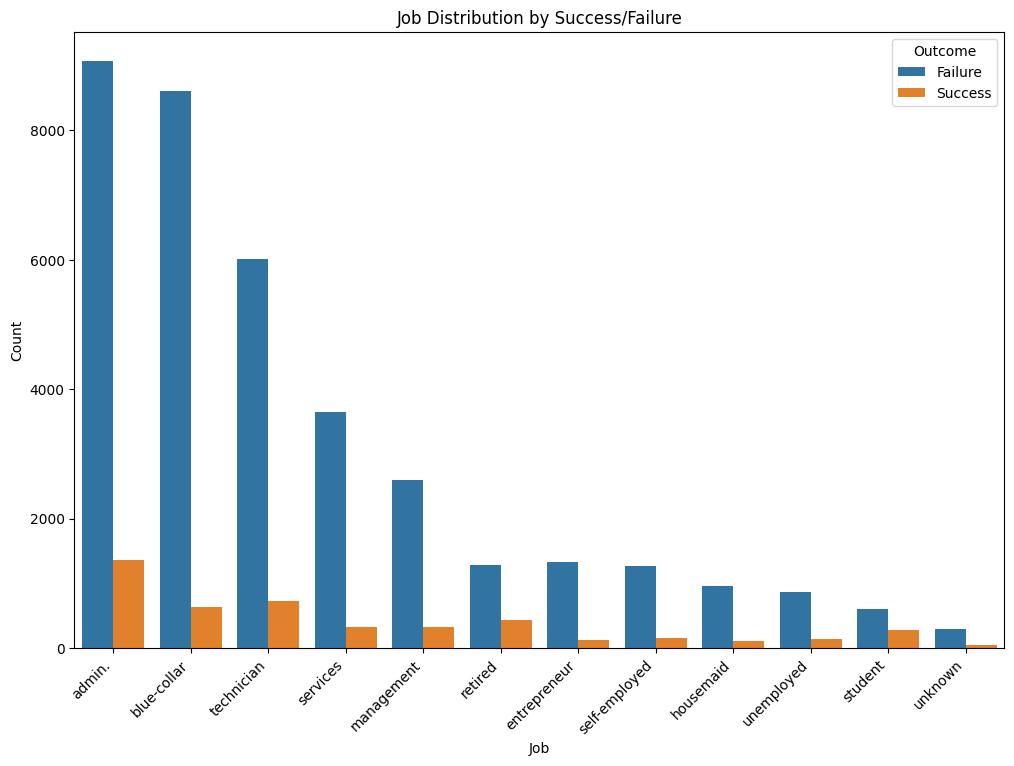

In [43]:
# Plot the JOB distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='job', data=bank_data_set, hue='y', order=bank_data_set['job'].value_counts().index)

plt.title('Job Distribution by Success/Failure')
plt.xlabel('Job')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> More customers working as admin than any other profession
--> for each job failure is way higher than success

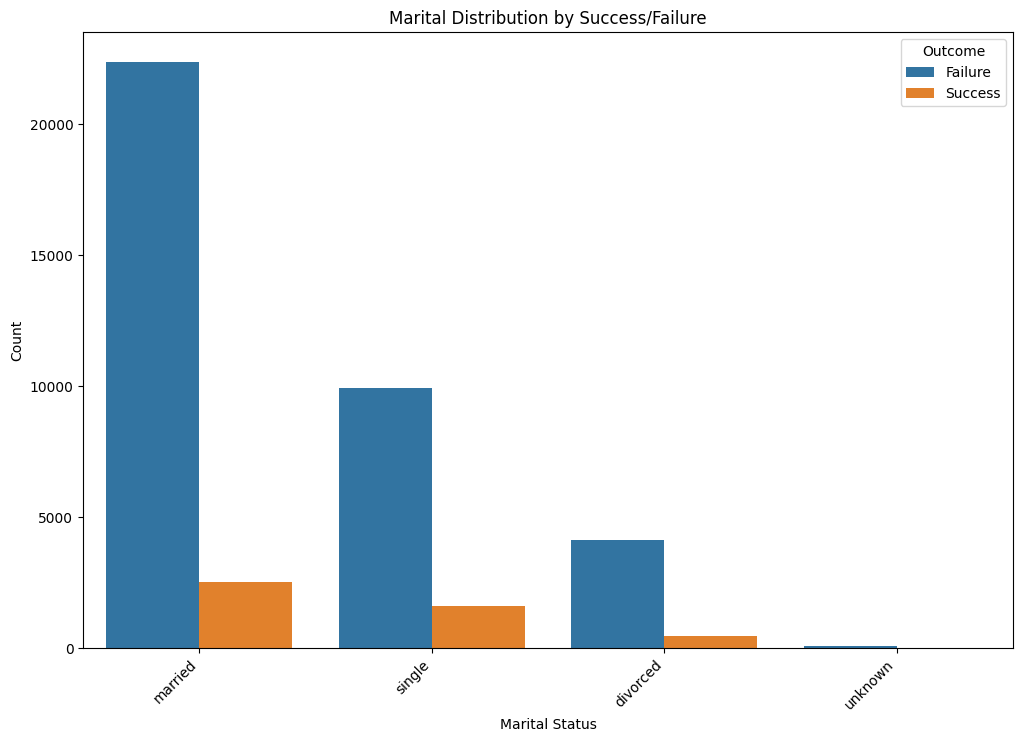

In [44]:
# Plot the MARITAL distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='marital', data=bank_data_set, hue='y', order=bank_data_set['marital'].value_counts().index)

plt.title('Marital Distribution by Success/Failure')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> Majority of the customers are married. Followed by Single, divorced and unknown

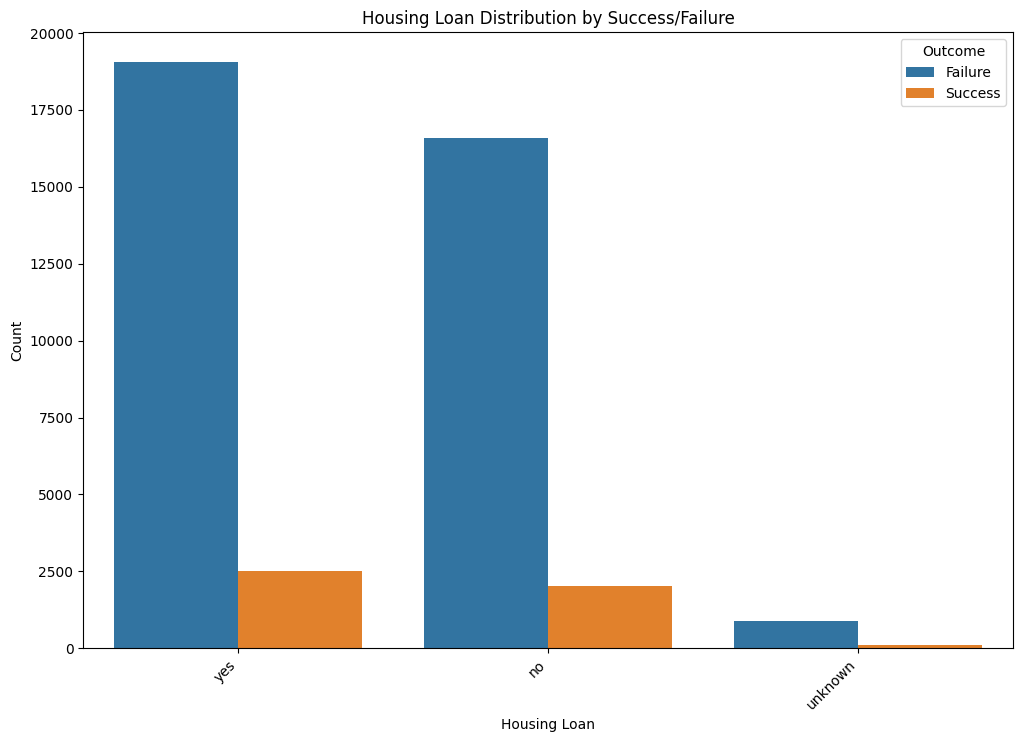

In [45]:
# Plot the HOUSING Loan distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='housing', data=bank_data_set, hue='y', order=bank_data_set['housing'].value_counts().index)

plt.title('Housing Loan Distribution by Success/Failure')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> Majority of the customers have a housing loan

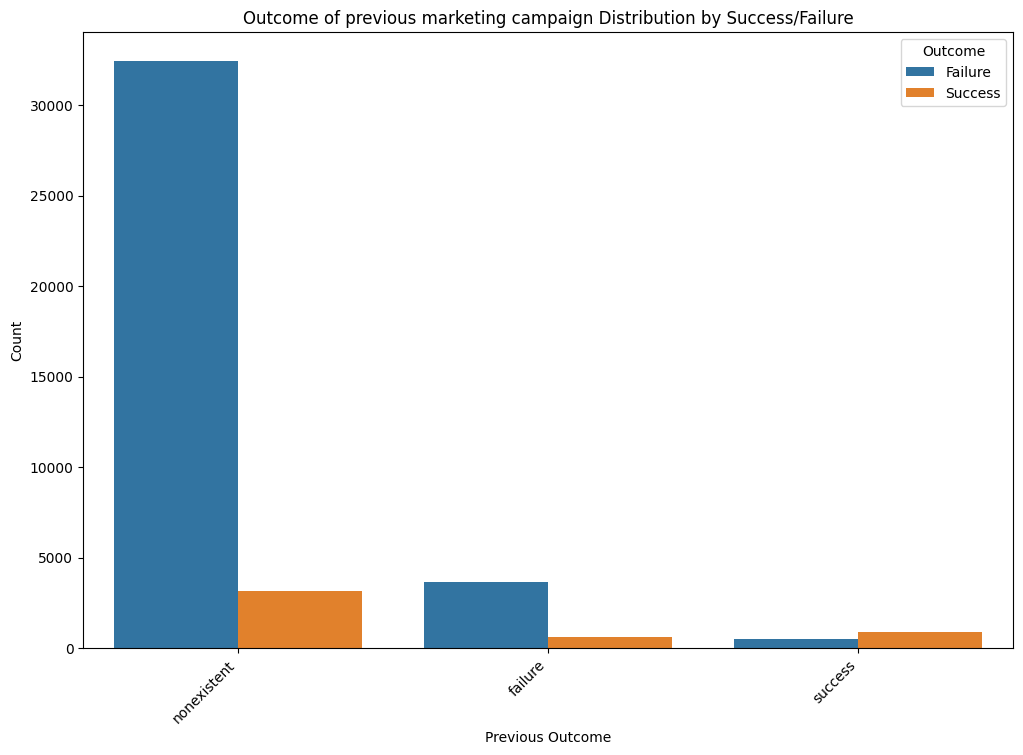

In [46]:
# Plot the POUTCOME distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='poutcome', data=bank_data_set, hue='y', order=bank_data_set['poutcome'].value_counts().index)

plt.title('Outcome of previous marketing campaign Distribution by Success/Failure')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> For most of the customers, the previous marketing campaign outcome does not exist (Most of the customers are new customers who have not been contacted earlier)
--> Customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit
--> Assumption, that this feature may hold some value in predicting the target variable (especially poutcome_success category)

In [47]:
# Plot the day_of_week distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='day_of_week', data=bank_data_set, hue='y', order=bank_data_set['day_of_week'].value_counts().index)

plt.title('Day of week Distribution by Success/Failure')
plt.xlabel('Day')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> Seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same

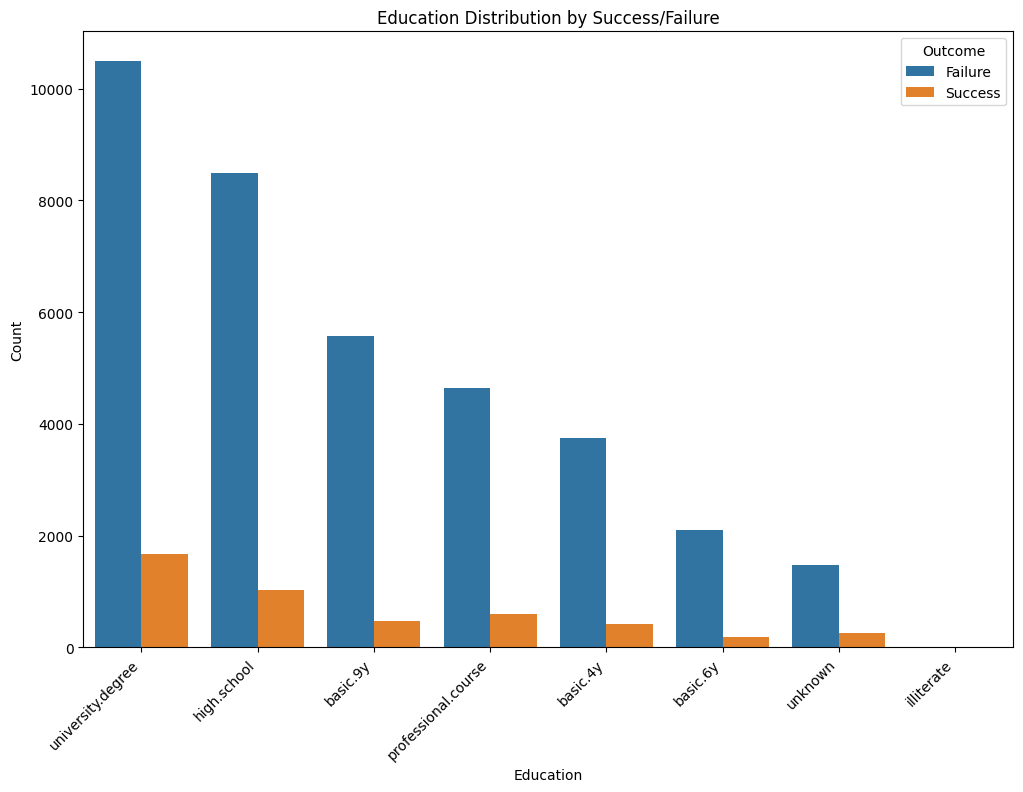

In [ ]:
# Plot the education distribution with hue for success and failure
plt.figure(figsize=(12, 8))

sns.countplot(x='education', data=bank_data_set, hue='y', order=bank_data_set['education'].value_counts().index)

plt.title('Education Distribution by Success/Failure')
plt.xlabel('Education')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Outcome', loc='upper right', labels=['Failure', 'Success'])

plt.show()

--> Most people in the data set have a university degree

Analysis of Numerical features:
1. Age
2. Duration (Of the last contact, in seconds)
    --> Not include in our final models, as we want to create a realistic predictive model
    --> But implementation of a basic model with the duration feature just to see how much of an impact this feature makes
3. euribor3m (denotes the basic rate of interest used in lending between banks on the European Union interbank market)

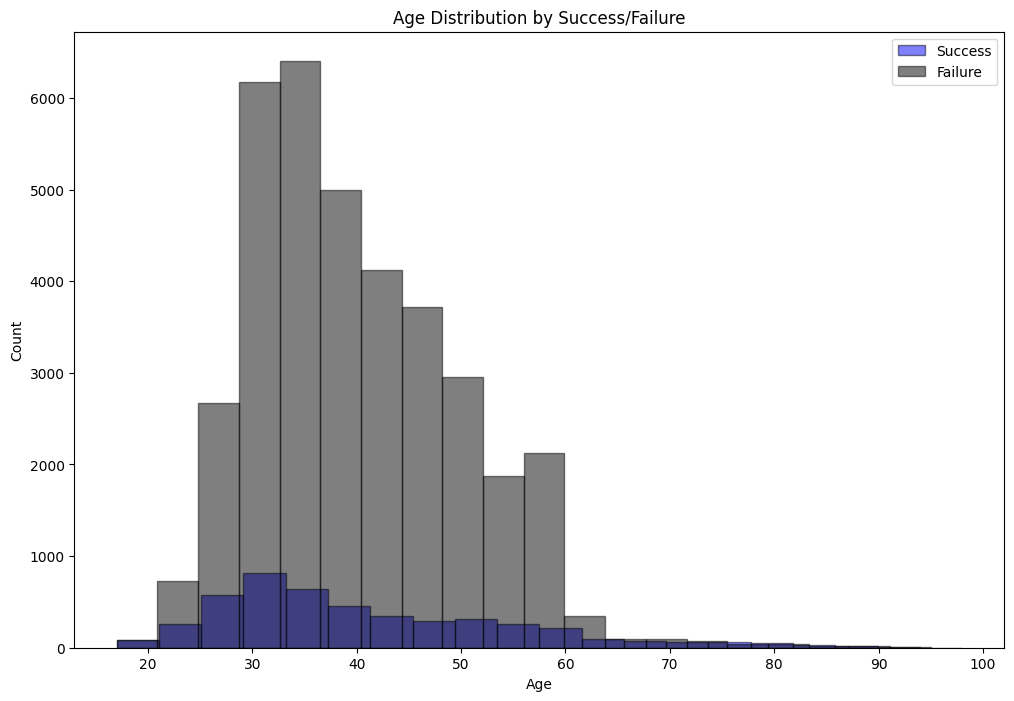

The mean age for people who subscribed is: 40.91 years
The mean age for people who did not subscribe is: 39.91 years


In [ ]:
# AGE Distribution

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the age histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['age'], bins=20, alpha=0.5, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['age'], bins=20, alpha=0.5, label='Failure', color='black', edgecolor='black')

plt.title('Age Distribution by Success/Failure')
plt.xlabel('Age')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

# Calculate the mean age for people who subscribed
mean_age_success = success_data['age'].mean()

# Calculate the mean age for people who did not subscribe
mean_age_failure = failure_data['age'].mean()

print(f'The mean age for people who subscribed is: {mean_age_success:.2f} years')
print(f'The mean age for people who did not subscribe is: {mean_age_failure:.2f} years')


--> Customers that subscibed or didn’t subscribe a term deposit have a median age of around 40
--> Age isn’t necessarily a good indicator for which customer will subscribe and which customer will not

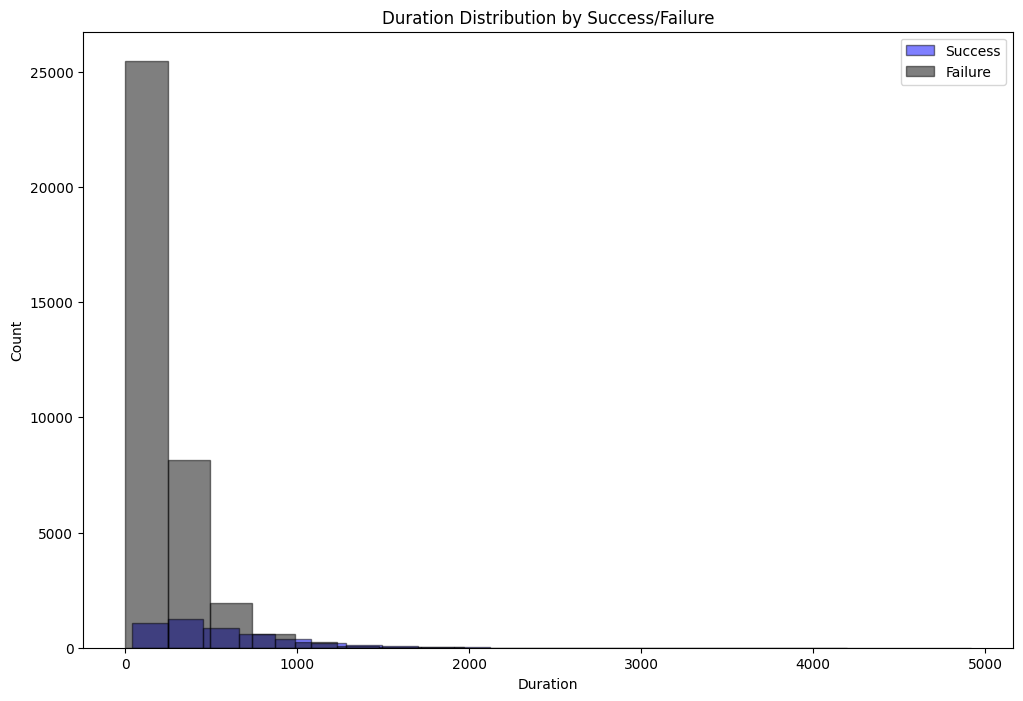

The mean duration for people who subscribed is: 553.19 sec
The mean duration for people who did not subscribe is: 220.84 sec


In [ ]:
# DURATION Distribution

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the duration histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['duration'], bins=20, alpha=0.5, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['duration'], bins=20, alpha=0.5, label='Failure', color='black', edgecolor='black')

plt.title('Duration Distribution by Success/Failure')
plt.xlabel('Duration')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

# Calculate the mean duration for people who subscribed
mean_duration_success = success_data['duration'].mean()

# Calculate the mean duration for people who did not subscribe
mean_duration_failure = failure_data['duration'].mean()

print(f'The mean duration for people who subscribed is: {mean_duration_success:.2f} sec')
print(f'The mean duration for people who did not subscribe is: {mean_duration_failure:.2f} sec')

--> Last contact duration of a customer can be useful for predicting the target variable
--> Expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes

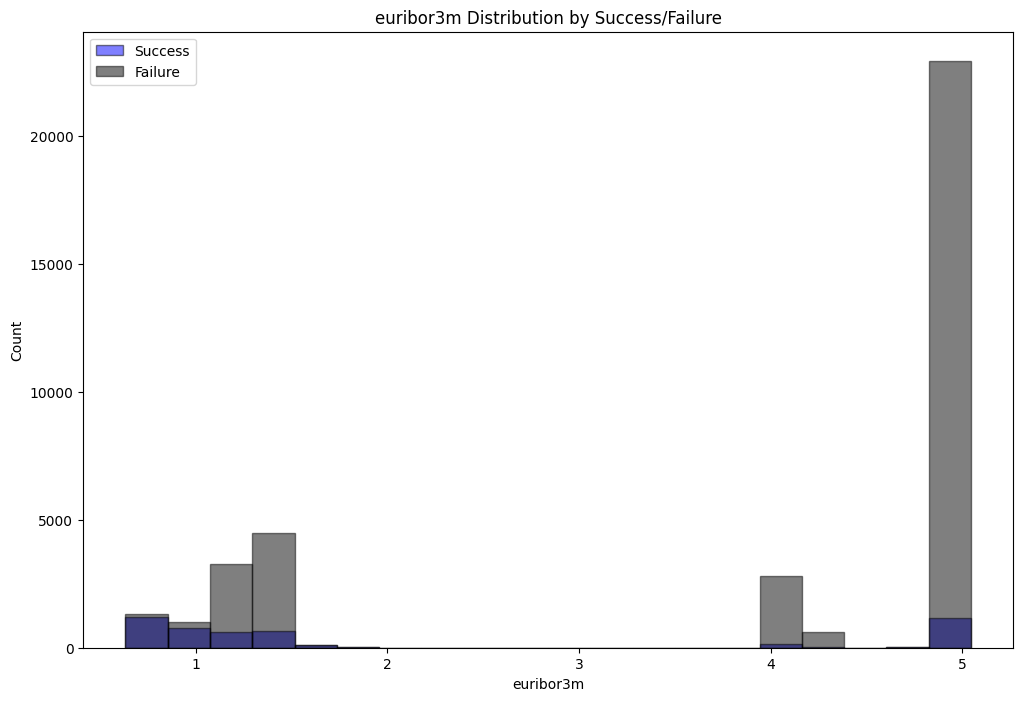

In [ ]:
# EURIBOR3M Distribution

# Welche Darstellungsweise würde sich hier besser anbieten??

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the euribor3m histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['euribor3m'], bins=20, alpha=0.5, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['euribor3m'], bins=20, alpha=0.5, label='Failure', color='black', edgecolor='black')

plt.title('euribor3m Distribution by Success/Failure')
plt.xlabel('euribor3m')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

--> Difference in median for both the classes
--> Indicates that the feature can be very useful for our case study
--> But we can validate the assumption only by applying models and extracting feature importance